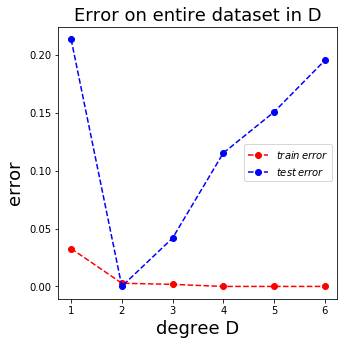

In [50]:
from __future__ import division
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# load data
def load_data():
    data = np.array(np.genfromtxt('C:/Users/10448/Desktop/galileo_ramp_data.csv', delimiter=','))
    x = np.reshape(data[:,0],(np.size(data[:,0]),1))
    y = np.reshape(data[:,1],(np.size(data[:,1]),1))
    return x,y

# Fourier features
def poly_features(x,D):
    F = np.ones((len(x),D+1))
    for i in range(len(x)):
        for j in range(D+1):
            F[i,j] = x[i]**j
    F = F.T

    return F

# plot train error and test error over all D tested 
def plot_error(train,test,deg):
    plt.plot(np.arange(1,np.size(train)+1),train,'ro--')
    plt.plot(np.arange(1,np.size(test)+1),test,'bo--')
    plt.title('Error on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('error       ', fontsize=18)
    plt.legend([r'$train\:error$',r'$test\:error$'])

# run over all the degrees and calculate errors
def try_all_degs(x,y,deg_range):
    
    # split data
    kf = KFold(n_splits = 6,shuffle = False)
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    for train_index, test_index in kf.split(x):
        x_train.append(x[train_index])
        x_test.append(x[test_index])
        y_train.append(y[train_index])
        y_test.append(y[test_index])
    
    # generate train and test error features
    train_error = []
    test_error = []
    train_error_ave = 0
    test_error_ave = 0

    # calculate errors
    for D in np.arange(0,np.size(deg_range)):
        # generate poly feature transformation
        for i in range(np.size(x_train,0)):
            F_train = poly_features(x_train[i],deg_range[D])
            F_test = poly_features(x_test[i],deg_range[D])
            # get error
            temp_train = np.linalg.pinv(np.dot(F_train,F_train.T))
            w_train = np.dot(np.dot(temp_train,F_train),y_train[i])
            tr_error = np.linalg.norm(np.dot(F_train.T,w_train)-y_train[i])/np.size(y_train[i])
            temp_test = np.linalg.pinv(np.dot(F_test,F_test.T))
            w_test = w_train
            te_error = np.linalg.norm(np.dot(F_test.T,w_test)-y_test[i])/np.size(y_test[i])
            train_error_ave = train_error_ave + tr_error/(np.size(x_train,0))
            test_error_ave = test_error_ave + te_error/(np.size(x_train,0))
            
        train_error.append(tr_error)
        test_error.append(te_error)
        train_error_ave = 0
        test_error_ave = 0
    
    # make plot of train and test errors
    fig = plt.figure(figsize = (5,5))
    plot_error(train_error,test_error,deg_range)
    plt.show()
    
# load data and defined degree range
x, y = load_data()
deg_range = [1,2,3,4,5,6]           # degree polynomial to try

# run all over degree range
try_all_degs(x,y,deg_range)